# Daily Object Packaging Image Classification

**Brief Problem Statement**
This project focuses on developing a multi-class image classification system designed to identify various types of consumer product packaging. Given its utility in retail analytics, inventory automation, and sustainable recycling systems, automated packaging recognition remains a highly relevant field of study. Leveraging the vast availability of e-commerce and promotional imagery online, I will compile a custom dataset using DuckDuckGo image scraping. The dataset will prioritize clear, front-facing views while maintaining diverse environmental and branding variations. Following a rigorous cleaning and preprocessing phase, the data will be used to benchmark three distinct deep learning architectures. The final model selection will be determined by a comparative analysis of validation accuracy and loss metrics.

**Categories**
1. Bottled Water
2. Soft Drink Cans
3. Milk Cartons
4. Snack Chips Packets
5. Chocolate Bars
6. Instant Noodles Packets
7. Toothpaste Boxes
8. Shampoo Bottles
9. Soap Bars
10. Cooking Oil Bottles
11. Coffee Jars
12. Detergent Packs

# Setting Up Necessary Things

In [1]:
batch_size = 8

In [2]:
!pip install -Uqq fastai fastbook nbdev icrawler

In [9]:
from fastai import *
from fastbook import *
from fastai.vision.all import *
from icrawler.builtin import BingImageCrawler

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd /content/drive/MyDrive/Capstone2/daily_object_packaging_image

/content/drive/MyDrive/Capstone2/daily_object_packaging_image


# Image Download using DuckDuckGo Image Search

In [7]:
pkg_labels = [
    "Bottled Water",
    "Soft Drink Cans",
    "Milk Cartons",
    "Snack Chips Packets",
    "Chocolate Bars",
    "Instant Noodles Packets",
    "Toothpaste Boxes",
    "Shampoo Bottles",
    "Soap Bars",
    "Cooking Oil Bottles",
    "Coffee Jars",
    "Detergent Packs"
]
len(pkg_labels)

12

In [13]:
TARGET = 100
BUFFER = 150

In [17]:
# keyword expansion -- to catch more image for the same category image and bypass the bing rate limit
expansions = {
    "Bottled Water": ["Water Bottle", "Mineral Water", "Pack of Water Bottles"],
    "Soft Drink Cans": ["Soda Can", "Cola Can", "Soft Drinks"],
    "Milk Cartons": ["Milk Box", "Pack of Milk", "Carton Milk"],
    "Snack Chips Packets": ["Chips Packet", "Snack Chips", "Potato Chips Pack"],
    "Chocolate Bars": ["Chocolate", "Chocolate Candy", "Choco Bar"],
    "Instant Noodles Packets": ["Instant Noodles", "Noodle Pack", "Ramen Noodles"],
    "Toothpaste Boxes": ["Toothpaste", "Dental Cream Box", "Toothpaste Pack"],
    "Shampoo Bottles": ["Shampoo", "Hair Shampoo Bottle", "Shampoo Pack"],
    "Soap Bars": ["Soap", "Bath Soap", "Soap Pack"],
    "Cooking Oil Bottles": ["Cooking Oil", "Oil Bottle", "Vegetable Oil Bottle"],
    "Coffee Jars": ["Coffee", "Instant Coffee Jar", "Coffee Pack"],
    "Detergent Packs": ["Detergent", "Laundry Detergent Pack", "Washing Powder Pack"]
}

for label in pkg_labels:
    save_dir = f"images/{label.replace(' ', '_')}"
    os.makedirs(save_dir, exist_ok=True)

    # Crawl original + expanded keywords
    all_keywords = [label] + expansions.get(label, [])

    downloaded = len(os.listdir(save_dir))
    for kw in all_keywords:
        if downloaded >= TARGET:
            break  # Stop if target reached

        crawler = BingImageCrawler(
            storage={"root_dir": save_dir},
            feeder_threads=1,
            parser_threads=1,
            downloader_threads=1
        )

        crawler.crawl(keyword=kw, max_num=BUFFER)

        downloaded = len(os.listdir(save_dir))

    print(f"{label}: downloaded {downloaded} images")
    if downloaded < TARGET:
        print(f"Could not reach {TARGET} images for '{label}'")

Bottled Water: downloaded 84 images
Could not reach 100 images for 'Bottled Water'


ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/021/503/836/non_2x/soda-can-illustration-in-cartoon-style-free-vector.jpg


Soft Drink Cans: downloaded 92 images
Could not reach 100 images for 'Soft Drink Cans'


ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/017/241/796/non_2x/milk-package-design-milk-label-design-milk-boxes-set-and-bottle-box-realistic-3d-illustration-creative-packaging-template-product-design-food-banner-cute-cow-logo-cartoon-illustration-vector.jpg


Milk Cartons: downloaded 74 images
Could not reach 100 images for 'Milk Cartons'


ERROR:downloader:Exception caught when downloading file https://www.iowasource.com/wp-content/uploads/2018/01/chips.jpg, error: HTTPSConnectionPool(host='www.iowasource.com', port=443): Max retries exceeded with url: /wp-content/uploads/2018/01/chips.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x788a01a3a8d0>, 'Connection to www.iowasource.com timed out. (connect timeout=5)')), remaining retry times: 2
ERROR:downloader:Exception caught when downloading file https://www.iowasource.com/wp-content/uploads/2018/01/chips.jpg, error: HTTPSConnectionPool(host='www.iowasource.com', port=443): Max retries exceeded with url: /wp-content/uploads/2018/01/chips.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x788a02b160c0>, 'Connection to www.iowasource.com timed out. (connect timeout=5)')), remaining retry times: 1
ERROR:downloader:Exception caught when downloading file https://www.iowasource.com/wp-content/uploads/2018/01/chip

Snack Chips Packets: downloaded 77 images
Could not reach 100 images for 'Snack Chips Packets'


ERROR:downloader:Exception caught when downloading file http://media.beam.usnews.com/35/17/17d25878476f919a3aa08e67ec8a/180102-chocolate-editorial.jpg, error: HTTPSConnectionPool(host='www.usnews.com', port=443): Read timed out. (read timeout=5), remaining retry times: 2
ERROR:downloader:Exception caught when downloading file http://media.beam.usnews.com/35/17/17d25878476f919a3aa08e67ec8a/180102-chocolate-editorial.jpg, error: HTTPSConnectionPool(host='www.usnews.com', port=443): Read timed out. (read timeout=5), remaining retry times: 1
ERROR:downloader:Exception caught when downloading file http://media.beam.usnews.com/35/17/17d25878476f919a3aa08e67ec8a/180102-chocolate-editorial.jpg, error: HTTPSConnectionPool(host='www.usnews.com', port=443): Read timed out. (read timeout=5), remaining retry times: 0
ERROR:downloader:Exception caught when downloading file https://www.washingtonpost.com/rf/image_606w/2010-2019/WashingtonPost/2014/02/05/Others/Images/2014-02-05/KD_chocolate4139161954

Chocolate Bars: downloaded 95 images
Could not reach 100 images for 'Chocolate Bars'


ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/thumbnails/011/840/227/small_2x/close-up-of-instant-noodles-isolated-photo.jpg


Instant Noodles Packets: downloaded 79 images
Could not reach 100 images for 'Instant Noodles Packets'


ERROR:downloader:Response status code 403, file https://www.cosmeticsinfo.org/wp-content/uploads/2023/10/GettyImages-995695892-scaled.jpg
ERROR:downloader:Response status code 403, file https://www.columbia-smiles.com/wp-content/uploads/2021/02/toothpaste.jpg


Toothpaste Boxes: downloaded 85 images
Could not reach 100 images for 'Toothpaste Boxes'


ERROR:downloader:Response status code 404, file https://img95.699pic.com/photo/50527/5553.jpg


Shampoo Bottles: downloaded 87 images
Could not reach 100 images for 'Shampoo Bottles'
Soap Bars: downloaded 98 images
Could not reach 100 images for 'Soap Bars'
Cooking Oil Bottles: downloaded 89 images
Could not reach 100 images for 'Cooking Oil Bottles'


ERROR:downloader:Response status code 403, file https://static.turbosquid.com/Preview/2014/12/01__16_11_44/1.jpg
ERROR:downloader:Response status code 403, file https://static.turbosquid.com/Preview/2014/12/01__16_11_44/6.jpg
ERROR:downloader:Response status code 403, file https://static.turbosquid.com/Preview/2014/12/01__16_11_44/5.jpg
ERROR:downloader:Exception caught when downloading file https://www.jarbottles.com/wp-content/uploads/2024/07/Glass-Coffee-Jars-1.jpg, error: HTTPSConnectionPool(host='www.jarbottles.com', port=443): Max retries exceeded with url: /wp-content/uploads/2024/07/Glass-Coffee-Jars-1.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x788a02cff350>, 'Connection to www.jarbottles.com timed out. (connect timeout=5)')), remaining retry times: 2
ERROR:downloader:Exception caught when downloading file https://www.jarbottles.com/wp-content/uploads/2024/07/Glass-Coffee-Jars-1.jpg, error: HTTPSConnectionPool(host='www.jarbottles.com', p

Coffee Jars: downloaded 98 images
Could not reach 100 images for 'Coffee Jars'
Detergent Packs: downloaded 86 images
Could not reach 100 images for 'Detergent Packs'


# From Data to Data Loaders

In [19]:
help(get_image_files)

Help on function get_image_files in module fastai.data.transforms:

get_image_files(path, recurse=True, folders=None)
    Get image files in `path` recursively, only in `folders`, if specified.



In [22]:
data_path = Path("images")

In [23]:
print(data_path)

images


In [25]:
!ls {data_path}

Bottled_Water	Cooking_Oil_Bottles	 Milk_Cartons	      Soap_Bars
Chocolate_Bars	Detergent_Packs		 Shampoo_Bottles      Soft_Drink_Cans
Coffee_Jars	Instant_Noodles_Packets  Snack_Chips_Packets  Toothpaste_Boxes


In [20]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # recursively get all images in path
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # 90-10 train/validation split
    get_y=parent_label,                               # folder name as label
    item_tfms=Resize(128),                            # resize images to 128x128
    batch_tfms=Normalize.from_stats(*imagenet_stats) # optional: normalize like ImageNet
)

In [26]:
dls = dblock.dataloaders(
    source=data_path,   # path to root images folder
    bs=batch_size,      # batch size
    shuffle=True        # ensure training data is shuffled
)


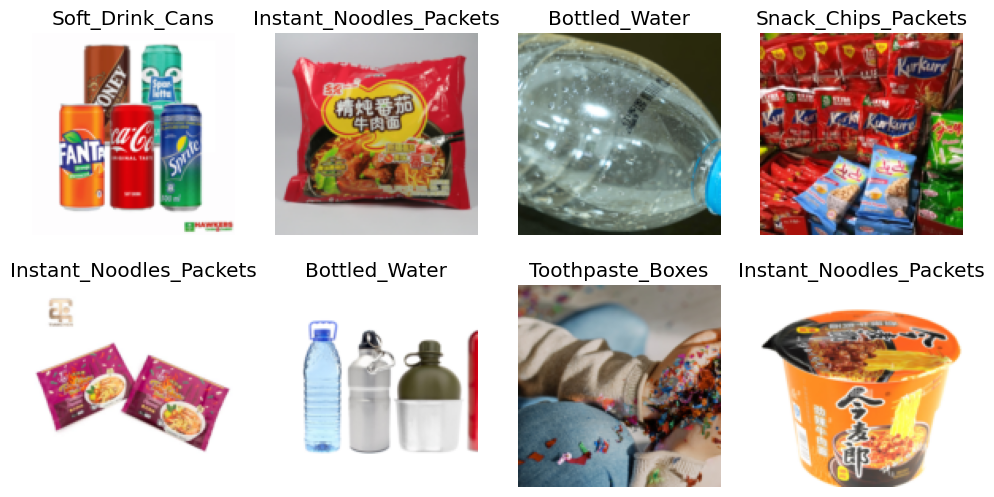

In [33]:
dls.train.show_batch(max_n=8, nrows=2)

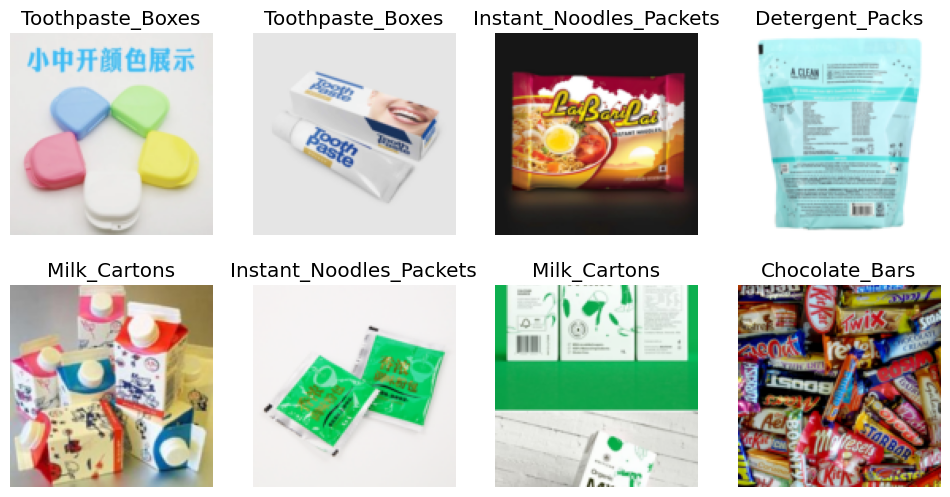

In [36]:
dls.valid.show_batch(max_n=8, nrows=2)

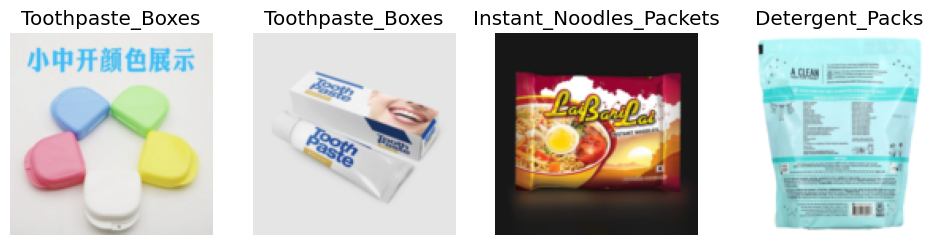

In [37]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

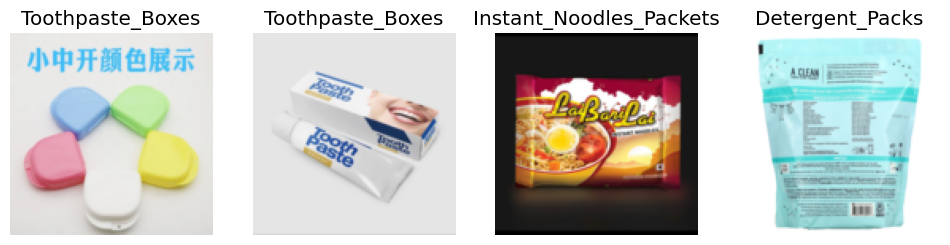

In [38]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

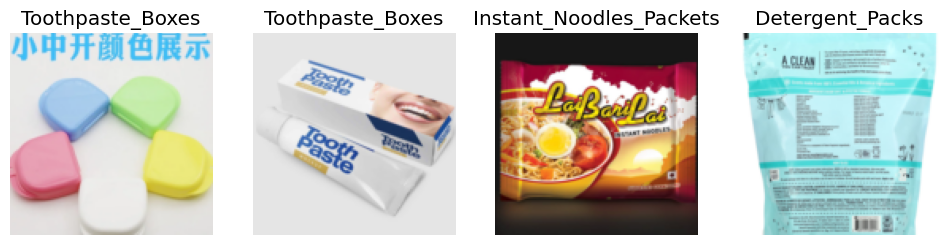

In [39]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

In [40]:
help(aug_transforms)

Help on function aug_transforms in module fastai.vision.augment:

aug_transforms(mult: 'float' = 1.0, do_flip: 'bool' = True, flip_vert: 'bool' = False, max_rotate: 'float' = 10.0, min_zoom: 'float' = 1.0, max_zoom: 'float' = 1.1, max_lighting: 'float' = 0.2, max_warp: 'float' = 0.2, p_affine: 'float' = 0.75, p_lighting: 'float' = 0.75, xtra_tfms: 'list' = None, size: 'int | tuple' = None, mode: 'str' = 'bilinear', pad_mode='reflection', align_corners=True, batch=False, min_scale=1.0)
    Utility func to easily create a list of flip, rotate, zoom, warp, lighting transforms.



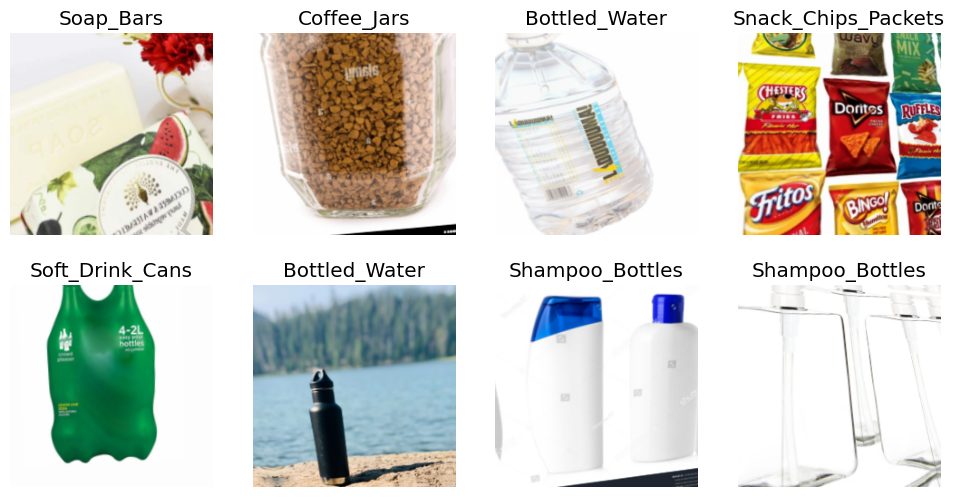

In [41]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [42]:
torch.save(dls, "pkg_dataloader_v0.pkl")